In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: right;"> &#9989; Rupita Tahsin

---
# __Optimization II - Portfolio Optimization__




<img alt="Quote from Harry Markowitz - A good portfolio ism ore than a long list of good stocks and bonds. It is a balanced whole, providing the investor with protections and opportunities with respect to a wide range of contingencies" src="https://www.azquotes.com/picture-quotes/quote-a-good-portfolio-is-more-than-a-long-list-of-good-stocks-and-bonds-it-is-a-balanced-harry-markowitz-79-24-14.jpg">


In today's assignment we are going to pretend that we are new members of a lab that need to redo some optimization experiments.  We have inherited this jupyter notebook and our adviser asked us to get it working.  

Unfortunately, for us it has been a few years and the dependencies for this project have changed.  We need to see if we can get it working despite these changes. 


**NOTE:** The code has problems and has been left "as is" to demonstrate a "real world" problem with getting other peoples code.  For this reason, we do not know how long it will take to fix the bugs or what we will learn. If we get done early we can explore turning this code into a python script. 

# Learning objectives

By the end of class you should be able to:
- Explain the mathematical consideration behind least square optmization.
- Use CVXPY to find optimal parameters for functions given data.
- Apply optimization to real world problem using portfolio optimization as an example.

# Outline

1. [Least square optimization](#CVXPY)
1. [Portfolio Optimization](#Portfolio_Optimization)
1. [Portfolio Example with Real Data](#Portfolio_Example_with_Real_Data)
1. [Appendix](#appendix)

----
<a name="CVXPY"></a>
# 1. Optimization example: least square

## 1.1 CVXPY

An optimization has one objective, which is to maximize/minimize one fuction, subject to some constraints. [CVXPY](http://www.cvxpy.org/) is a python package for [convex optimization](https://en.wikipedia.org/wiki/Convex_optimization), i.e., minimizing convex functions over convex sets:
- Convex function: the line segment connecting any two points, $x_1$ and $x_2$ on the graph of the function lies above the graph between the two points.
- Convex set: the set of points on or above the graph of the function between $x_1$ and $x_2$.

In this in-class assignment, we will use `CVXPY` to solve two optimization problems. The first is least square optimization.

&#9989; <font color=blue>**DO THIS:**</font> You should have installed `CVXPY` already in the conda `opt` environment. To use it, you need to make sure that, __before you start your Jupyter Notebook server__, you need to be in the `opt` environment:

- Open your terminal and activate `opt`.
- In the same terminal, issue the command `jupyter notebook`
- Run the following cell to see if `cvxpy` can be found.

In [22]:
import cvxpy

If the above lead to a `ModuleNotFound` error or any other issue, install `CVXPY` in the default location with `pip`, 

In [2]:
!pip install cvxpy

  Using cached cvxpy-1.3.0-cp39-cp39-win_amd64.whl (885 kB)
  Using cached osqp-0.6.2.post8-cp39-cp39-win_amd64.whl (292 kB)
  Using cached ecos-2.0.12-cp39-cp39-win_amd64.whl (72 kB)
  Using cached setuptools-64.0.2-py3-none-any.whl (1.2 MB)
  Using cached scs-3.2.2-cp39-cp39-win_amd64.whl (8.2 MB)
  Using cached qdldl-0.1.5.post3-cp39-cp39-win_amd64.whl (83 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.6.3
    Uninstalling setuptools-65.6.3:
      Successfully uninstalled setuptools-65.6.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.27 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.27 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.


## 1.2 Least square optimization

For example, suppose we have four points: $(-1, 0.5)$, $(1,-1)$, $(2,-0.5)$, and $(3,2)$, how can we find a __parabola__ that __miminize the sum of square residues__ between each point and the parabola? This is a least square optimization problem. Because this is in $\mathbb{R}^2$, the formula for the line is $Bx^2 + Cx + D = y$. 

So for the four points:
$$B\cdot (-1)^2 + C\cdot (-1) + D\cdot 1 = 0.5$$
$$B\cdot 1^2 + C\cdot 1 + D\cdot 1 = -1$$
$$B\cdot 2^2 + C\cdot 2 + D\cdot 1 = -0.5$$
$$B\cdot 3^2 + C\cdot 3 + D\cdot 1 = 2$$

With the above information, we can specify:
$$
A =
  \left[ {\begin{array}{cc}
    1 & -1 & 1\\
    1 &  1 & 1\\
    4 &  2 & 1\\
    9 &  3 & 1 
  \end{array} } \right],
X =
  \left[ {\begin{array}{cc}
    B \\
    C \\
    D
  \end{array} } \right],
b =
  \left[ {\begin{array}{cc}
    0.5 \\
    -1 \\
    -0.5 \\
    2
  \end{array} } \right]
$$

And the goal is to find $X$ that minimize the sum of square residues.

&#9989; <font color=blue>**DO THIS:**</font> Read the following and discss with your groupmates about what they mean.  

**Least Squares**
$$|| AX - b ||^2$$

In CVXPY this would be:

```Python
sum_squares(A*x - b)
```

**Expanding the equation** 

$$ || AX - b ||^2 = X^TA^TAX - 2(A^Tb)^TX + b^Tb$$

__Note__: If you want to know the details how this is obtained, see [Appendix](#appendix).

In CVXPY this would be:

```Python
quad_form(x, AtA) - 2*Atb.T@x + b.T.dot(b)
```

## 1.3 Using `CVXPY` for least square optimization

Make comments in the code and answer the question after the code. You may need to refer to the documentation on [scalar functions](https://www.cvxpy.org/tutorial/functions/index.html#scalar-functions) for the functions in the package.

&#9989; <font color=blue>**DO THIS:**</font> Discuss with your groupmates and provide comments on the lines for defining:
- `X`
- `objective`
- `constraints`
- `prob`
- `result`

In [27]:
# The following code is modified from https://www.cvxpy.org/examples/index.html ###
import cvxpy as cvx 
import numpy as np

m = 3
n = 3
A = np.matrix('1 -1 1; 1 1 1; 4 2 1; 9 3 1')
b = np.matrix('0.5; -1; -0.5; 2')
Atb = A.T.dot(b)
AtA = A.T.dot(A)

X = cvx.Variable((n,1)) 

objective   = cvx.Minimize(cvx.quad_form(X, AtA) - 2*Atb.T@X + b.T.dot(b))
constraints = [-10 <= X, X <= 30]
prob        = cvx.Problem(objective, constraints)

result = prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

[[B], [C], [D]] = X.value 
print(f"optimal param:\n\tB = {B}\n\tC = {C}\n\tD = {D}")

status: optimal
optimal value 0.11136363636364077
optimal param:
	B = 0.6022727272727267
	C = -0.8613636363636349
	D = -0.9318181818181817


&#9989; <font color=blue>**DO THIS:**</font> Plot the data points and the fitted line:

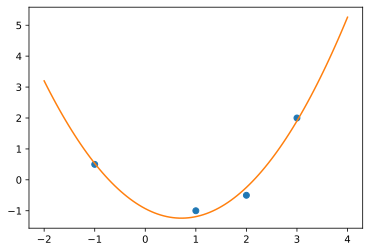

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

x = np.linspace(-2, 4, 100)
y = B*x**2 + C*x + D

ax.plot([-1,1,2,3], [0.5,-1,-0.5,2], 'o')
ax.plot(x, y, '-')

In [29]:
#Modifying the code by increasing the number of data points and changing  the constraint range 


m = 3   #number of rows
n = 3   #number of columns
A = np.matrix('1 -1 1; 1 1 1; 4 2 1; 9 3 1')
b = np.matrix('0.5; -1; -0.5; 2')
Atb = A.T.dot(b)
AtA = A.T.dot(A)

X = cvx.Variable((n,1)) 

objective   = cvx.Minimize(cvx.quad_form(X, AtA) - 2*Atb.T@X + b.T.dot(b))
constraints = [-5 <= X, X <= 5] #This is the range where the x values are being searched 
                               #so increasing this range makes the curve fit much better
prob        = cvx.Problem(objective, constraints)

result = prob.solve()
print("status:", prob.status)
print("optimal value", prob.value)

[[B], [C], [D]] = X.value 
print(f"optimal param:\n\tB = {B}\n\tC = {C}\n\tD = {D}")




status: optimal
optimal value 0.11136363636364077
optimal param:
	B = 0.6022727272727267
	C = -0.8613636363636349
	D = -0.9318181818181817


Text(0.5, 1.0, 'Plot of the data points and fitted line')

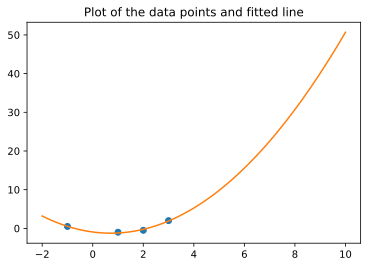

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

x = np.linspace(-2, 10, 100)
y = B*x**2 + C*x + D

ax.plot([-1,1,2,3], [0.5,-1,-0.5,2], 'o')
ax.plot(x, y, '-')
plt.title("Plot of the data points and fitted line")

#In the updated cvxpy use @ instead of * for dot product and check the cvxpy syntax from online 
#for example for sum of a variable matrix use sum() instead of np.sum

&#9989; <font color=red>**QUESTION:**</font> Are you satified with the optimization results? Modify the codes above to improve the results. What did you change?

<font size=+3>&#9998;</font> yes it improved. the points are in the equation now. 

----
<a name="Portfolio_Optimization"></a>
# 2. Classical (Markowitz) portfolio optimization

Classical portfolio optimization solves the optimization problem:

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma w^T\Sigma w\\
\mbox{subject to} & {\bf 1}^T w = 1, \quad w_i\geq 0,
\end{array}

Where:
- $w$: portfolio, a vector of length $n$ where $w_i$ is the fraction of fund invested in the $i$th asset, $i\in {1, 2, ..., n}$.
- $\mu$: expected return, a vector of length $n$ where $\mu_i$ is the expected rate of return for asset $i$.
- $\gamma >0$: the *risk aversion parameter*. Varying $\gamma$ gives the optimal *risk-return trade-off*. 
- $\Sigma$: Covariance matrrix of the return.
- ${\bf 1}^T w$: ${\bf 1}^T$ is a vector of 1s. The product adds up to 1.

We want to maximize $\mu^Tw - \gamma w^T\Sigma w$, the *risk-adjusted return* where:
- $\mu^Tw$ is the expected return.
- $\gamma w^T\Sigma w$ is the risk.

Here the return is fixed, so the maximization process is to minimize risk by finding the optimal $\gamma$.

&#9989; <font color=red>**QUESTION:**</font> Discuss with your group mates about the above. What are the  length or dimension of the following variables?

- $\gamma$ is scaler 
- $\Sigma$ is n*n

<font size=+3>&#9998;</font> - $\gamma$ is scaler 
- $\Sigma$ is n*n

&#9989; <font color=blue>**DO THIS:**</font> Import the necessary packages and set a few important variables for the optmization problem.

In [32]:
# Imports for this section
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cvxpy as cvx
import scipy.stats as spstats

In [33]:
# Generate data for portfolio optimization of 10 assets.
np.random.seed(19290115)
n_assets = 10
mu    = np.abs(np.random.randn(n_assets, 1))
Sigma = np.random.randn(n_assets, n_assets)
Sigma = Sigma.T.dot(Sigma)
gamma = cvx.Parameter(nonneg=True)

&#9989; <font color=blue>**DO THIS:**</font> Finish the following code to creat a optimization problem to optimize the portfolio. Some expressions are incomplete and marked with comments. 

In [34]:
# w     = # Need help to define the portfolio w
# ret   = # Need help to define the return
# risk  = # Need help to define risk

# obj   = # Need help to define objective
# cons  = [sum(w) == 1, w >= 0] # Constraints
# prob  = # Need help to define the problem


w=cvx.Variable((n_assets,1))
ret = mu.T @ w      #defining return
risk = cvx.quad_form(w, Sigma) #defining risk
obj=cvx.Maximize(ret - gamma * risk)
cons=[cvx.sum(w) == 1, w >= 0]
prob=cvx.Problem(obj,cons)

&#9989; <font color=blue>**DO THIS:**</font> The following code is used to plot the curve for the output for two different choices of $\gamma$. 

The portfolio optimization is a bi-objective optimization: high return and low risk. In order to solve this problem using only one objective, we will need to find a balancing parameter $\gamma$. By changing the parameter $\gamma$, we put different weights on the two objectives. 

E.g., some risky people may choose high return and does not care about the risk, so they will choose a small $\gamma$; some other conservative people may choose low risk but still can make profit, so they will choose a large $\gamma$ (minimizing the risk is equivalent to maximizing $-\gamma\cdot$risk). 

In [35]:
# Compute trade-off curve.

SAMPLES     = 100
risk_data_o = np.zeros(SAMPLES)
ret_data_o  = np.zeros(SAMPLES)
gamma_vals  = np.logspace(-2, 3, num=SAMPLES)

for i in range(SAMPLES):  
    
    gamma.value = gamma_vals[i]
    prob.solve()
    
    risk_data_o[i] = np.sqrt(w.value.T @ Sigma @ w.value)
    ret_data_o[i]  = mu.T @ w.value

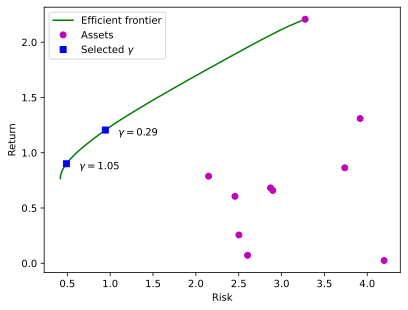

In [36]:
# Plot long only trade-off curve.
%config InlineBackend.figure_format = 'svg'

markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data_o, ret_data_o, 'g-')

asset_x = []
for i in range(n_assets):
    asset_x.append(cvx.sqrt(Sigma[i,i]).value)

plt.plot(asset_x, mu, 'mo')

for marker in markers_on:
    plt.plot(risk_data_o[marker], ret_data_o[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], 
                xy=(risk_data_o[marker]+0.15, ret_data_o[marker]-.05))
    
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend(["Efficient frontier", "Assets", "Selected $\gamma$"])
plt.show()

&#9989; <font color=blue>**DO THIS:**</font> Run the following code to plot the return distributions of the two $\gamma$ points in the previous graph.

1.205489107946699
0.900365308418015


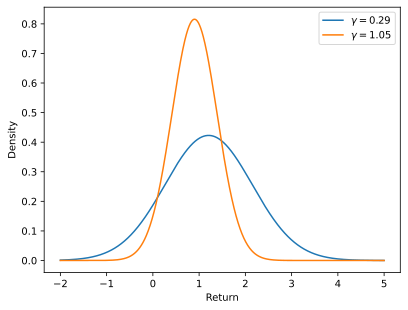

In [37]:
# Plot return distributions for two points on the trade-off curve.
import scipy.stats as spstats

plt.figure()

for midx, idx in enumerate(markers_on):
    gamma.value = gamma_vals[idx]
    prob.solve()
    x = np.linspace(-2, 5, 1000)
    
    plt.plot(x, spstats.norm.pdf(x, ret_data_o[idx], risk_data_o[idx]), 
             label=r"$\gamma = %.2f$" % gamma.value)    
    
    print(ret_data_o[idx])
    
plt.xlabel('Return')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

&#9989; **<font color=red>QUESTION:</font>**
* Which of the two $\gamma$ values have a less chance of losing money? Why?
* Which of the two $\gamma$ values have a chance for larger returns? Why?

<font size=+3>&#9998;</font> -The gamma value of 1.05 has lesser chance of losing money as the risk factor is lower and as per the efficient frontier plot the risk is 0.5 .

-The gamma value of 1.05 has chance of larger return as the density function of return for this plot has a much higher  peak value of 0.8 compared to 0.4 for the lower risk plot. So even though the total return is lower than the gamma=0.29 case by 0.35 (which indicates the maximum return is 28% lower), the probability of making that gain is double .

Considering these the best choice is to pick a gamma value of 1.05 which is less risky.

----
<a name="Portfolio_Example_with_Real_Data"></a>
# 3. Portfolio Example with Real Data


## 3.1 Install and import packages

In [38]:
!pip install pandas_datareader

In [39]:
# Imports for this section
import pandas as pd
import pandas_datareader as web   # Package and modules for importing data; this code may change depending on pandas version
import datetime
import numpy as np

import cvxpy as cvx

import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline

In [41]:
!pip install yfinance

     ---------------------------------------- 59.1/59.1 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00


## 3.2 Download and visualize stock data

&#9989; <font color=blue>**DO THIS:**</font> Run the following code to download stock data information from yahoo and plot them.

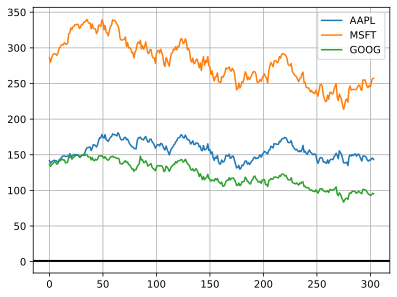

In [45]:
# # We will look at stock prices over the past few months, starting at Oct 1, 2020
# start = datetime.datetime(2021,10,1)
# end = datetime.datetime(2022,1,29)
 
# # Let's get Apple stock data; Apple's ticker symbol is AAPL
# # First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
# apple = web.DataReader("AAPL", "yahoo", start, end)
# microsoft = web.DataReader("MSFT", "yahoo", start, end)
# google = web.DataReader("GOOG", "yahoo", start, end)
 
# # Below I create a DataFrame consisting of the adjusted closing price of these stocks, 
# # first by making a list of these objects and using the join method
# stocks = pd.DataFrame({"AAPL": apple["Adj Close"],
#                       "MSFT": microsoft["Adj Close"],
#                       "GOOG": google["Adj Close"],
#                       })
stocks = pd.read_csv('stock_data.csv')
stocks.plot(grid = True).axhline(y = 1, color = "black", lw = 2)


&#9989; <font color=blue>**DO THIS:**</font> Let's plot the return, i.e., the value of the stock at various time points compared to the starting time point. Note that:

- `df.apply(arg)` will apply the function arg to each column in df, and return a DataFrame with the result. 
- `lambda x` is an anonymous function accepting parameter `x`; in this case, `x` will be a Pandas `Series` object


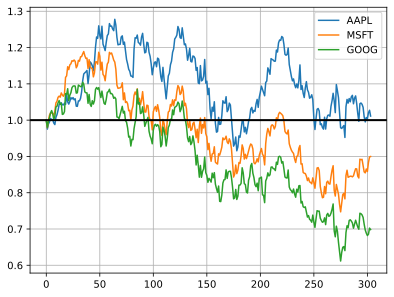

In [46]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

## 3.3 Assess the trends

How are we going to find the trends? From the privous figure, we can see that return rate of three stocks for the last 12 months. 

Let's focus on just the most recent month. We can find the trend of these stocks (expected return rate for the next day and the covariance of the return for the next day):

$$
\frac{\text{price today} - \text{price yesterday}}{\text{price yesterday}}
$$

&#9989; <font color=blue>**DO THIS:**</font> Let's convert the data frame to a matrix for the convenience of further calculation. Next, let's calculate a return vector of the records we downloaded.

Text(0, 0.5, 'Return')

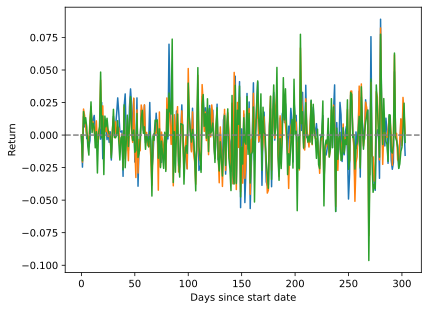

In [47]:
sr = np.asmatrix(stocks.apply(lambda x: x ))
return_vec = np.zeros(sr.shape)

# For each time point $i$
for i in range(1,len(sr)):
    prev = sr[i-1,:]
    
    # For each stock 
    for s in range(3):
        return_vec[i,s] = (sr[i,s] - sr[i-1,s])/sr[i-1,s]
        
return_vec = return_vec.T

plt.plot(return_vec.T)
plt.xlabel('Days since start date')
plt.axhline(y=0, color='gray', linestyle='--')
plt.ylabel('Return')

&#9989; <font color=blue>**DO THIS:**</font> Modify the following codes to:

- Print out the dimensions of `mu` and `Sigma` defined in `property_portfolio`.
- Provide DocString for `random_portfolio`.

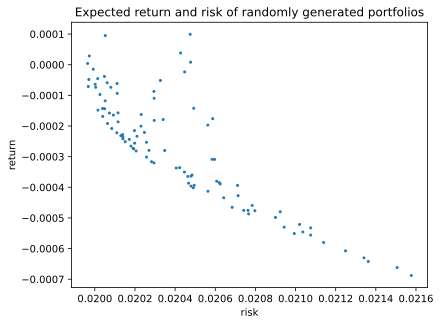

In [48]:
def property_portfolio(return_vec):
    ''' Returns the expected return rate and covariance of return rates for the four random portfolios returns_vec'''
    mu = np.mean(return_vec, axis=1)
    Sigma = np.cov(return_vec)
    print(mu,shape)
    return mu, Sigma

def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(return_vec, n_portfolio):
    '''
    WHAT THIS IS DOING
    
    Parameters:
      return_vec (DATATYPE): DESCRIPTION.
      n_portfolio (DATATYPE): DESCRIPTION.
      
    Return:
      ret_data (DATATYPE): DESCRIPTION.
      risk_data (DATATYPE: DESCRIPTION.
    '''
    ret_data  = np.zeros((n_portfolio,1))
    risk_data = np.zeros((n_portfolio,1))
    
    mu, Sigma = property_portfolio(return_vec)
    for i in range(n_portfolio):
        '''consider the long only portfolio'''
        w            = rand_weights(return_vec.shape[0]) 
        ret_data[i]  = np.dot(w, mu)
        risk_data[i] = np.sqrt(np.dot(np.matmul(w, Sigma), w))

    return ret_data, risk_data

n_portfolios = 100
ret_data, risk_data = random_portfolio(return_vec, n_portfolios)

plt.plot(risk_data,ret_data, 'o', markersize=2)
plt.xlabel('risk')
plt.ylabel('return')
plt.title('Expected return and risk of randomly generated portfolios')
plt.show()

## 3.4 Put it all together

&#9989; **<font color=blue>DO THIS:</font>**  Use what you learn in Section 3 and finish the missing code below to optimize the portfolio.

In [59]:
np.random.seed(1)
n = return_vec.shape[0]
mu,Sigma = property_portfolio(return_vec)

# w     = # Define w, fraction of assets to invest
# gamma = # Define gamma, risk aversion parameter
# ret   = # Define returns
# risk  = # Define risk
# obj   = # Define objective function
# cons  = [cvx.sum(w) == 1, w >= 0] 
# prob  = # Define problem

np.random.seed(1)
n = return_vec.shape[0]
mu,Sigma = property_portfolio(return_vec)

w = cvx.Variable((n,1)) # Define w, fraction of assets to invest
#gamma =1.5   #Used this value close to the best case in the last run  # Define gamma, risk aversion parameter
gamma = cvx.Parameter(nonneg=True)

ret   =mu.T @ w # Define returns
risk  =cvx.quad_form(w, Sigma)# Define risk
obj   =cvx.Maximize(ret - gamma * risk) # Define objective function
cons  = [cvx.sum(w) == 1, w >= 0] 
prob  = cvx.Problem(obj,cons)# Define problem



&#9989; **<font color=blue>DO THIS:</font>**  Plot the trade-off curve  your randomly generated portfolios from the cell above. 

In [60]:
print("The mean and standard deviation of the portfolio are", mu, Sigma)

The mean and standard deviation of the portfolio are [ 0.00025968 -0.00012812 -0.0009196 ] [[0.00044857 0.00035503 0.00036693]
 [0.00035503 0.00044043 0.00040376]
 [0.00036693 0.00040376 0.00052235]]


In [61]:
# Compute trade-off curve.
SAMPLES     = 100
risk_data_o = np.zeros(SAMPLES)
ret_data_o  = np.zeros(SAMPLES)
gamma_vals  = np.logspace(-2, 3, num=SAMPLES)

for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data_o[i] = cvx.sqrt(risk).value/gamma.value**0.5
    ret_data_o[i] = ret.value
    
# Plot efficient frontier curve.
markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data_o, ret_data_o, 'g-')

# Plot risk/return for n assets
plt.plot(risk_data,ret_data, 'o', markersize=2)

# Plot risk/return for the 3 stocks we have downloaded
s_names = ['Apple', 'Microsoft', 'Google']
for i in range(n):
    plt.plot(cvx.sqrt(Sigma[i,i]).value, mu[i], 'mo')
    ax.annotate(s_names[i], 
                xy=(cvx.sqrt(Sigma[i,i]).value, mu[i]))
      
plt.xlabel('Risk')
plt.ylabel('Return')
plt.legend(["Efficient frontier", "Random assets", "Selected stock"])
plt.show()   

&#9989; **<font color=red>QUESTION:</font>** How does the green line relate to the blue dots in the scatter plot? What can you conclude from this relationship?

Also, do the risk/return for the three stocks we downloaded make sense to you? Why and why not?

<font size=+3>&#9998;</font> Put your answer to the above question here
-The green line indicates the efficient asset frontier suggested by our optimization algorithm per which we should only be buying apple stocks, as that is the only one coinciding with the efficient frontier because of the high return. The blue dots are the random assets which do not coincide with the frontier considering the return and risk optimization problem posed.

-The risks for the 3 stocks are almost similar which makes sense to me based on the initial data of stock prices. However, I did not anticipate the total retrun from Apple to be so much higher than Microsoft and Google to be so much lower than microsoft. The raw data suggested the stocks all being growing with apple growing fastest, followed by Microsoft and then google.

## 3.5 Try more stocks

&#9989; **<font color=blue>DO THIS:</font>** If there is still time:
* Convert this example into a python script. 
* Try messing with the above code to include Gamestop, AMC, Blackberry, Bed Bath & Beyond, and Nokia and see what happens. 

---
If you are interested in portfolio theory and think you can make money out of stock market, here are some YouTube videos from MIT MBA classes, which I watched for fun.

- https://www.youtube.com/watch?v=tL7Lcl90Sc0
- https://www.youtube.com/watch?v=J7d3vcaS9-o
- https://www.youtube.com/watch?v=z2oQe6B1Qa4

---------
# Congratulations, you're done with your in-class assignment!

__Please make sure you upload your file by 10pm the same day of the class!__ Late exercise will receive <=80% of the grade.

---
<a name="appendix"></a>
# Appendix

## Least square formula

$A$ is an $m\times n$ matrix. $x$ has a dimension of $n\times 1$. $b$ has a dimension of $m\times 1$.

$$
\begin{align}
||Ax-b||^2 & = (Ax-b)^T(Ax-b) \\
           & = ((Ax)^T - b^T)(Ax-b) \\
           & = (x^TA^T - b^T)(Ax-b) \\
           & = x^TA^T(Ax-b) - b^T(Ax-b) \\
           & = x^TA^TAx - x^TA^Tb - b^TAx - b^Tb \\
           & = x^TA^TAx - (Ax)^Tb - b^TAx - b^Tb \\
           & = x^TA^TAx - (b^TAx)^T - b^TAx - b^Tb \\
           & = x^TA^TAx - 2b^TAx - b^Tb \\
\end{align}
$$

__Note__:
- In line 2
  - $Ax$ lead to a $m\times 1$ column vector. $(Ax)^T$ is a row vector $1\times m$. 
  - $x^T$ is $1\times n$, $A^T$ is $n\times m$. So $x^TA^T$ leads to a row vector of $1\times m$ = $(Ax)^T$.
- In line 7, $b^TAx$ is a scalar, so $b^TAx = (b^TAx)^T$.

&#169; Copyright 2021,  Michigan State University Board of Trustees